In [123]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
import datetime




In [124]:
indicoio.config.api_key = 'd48be9a31ea9c241d883569acf6fd456'


In [125]:
with open('parkland.json', 'r') as myfile:
    data = json.loads(myfile.read())



In [126]:
count = 0
for x in data['comments']:
    count += 1

print("Number of comments in our dataset")
print(count)
    

Number of comments in our dataset
50500


In [127]:

    
extractor = URLExtract()

timestamp = []
body_text = []


num = 0
for x in data['comments']:
    num += 1
    
    
    # TEXT CLEANING
    input_str = data['comments'][x]['body'].lower() # all letters become lowercase    
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = re.sub(r'[^\w\s]','',input_str)   # removes punctuation
    input_str = input_str.replace('\n','')        # removes '/n'
    

    
    if( 'timestamp' in data['comments'][x] and input_str):
        body_text.append(input_str)
        timestamp.append(data['comments'][x]['timestamp'])



        
    




In [128]:
len(body_text)


50325

In [129]:
# Parsed the timestamp to create a list of datatime objects

from datetime import datetime


time = []

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    hour = parsed_date.hour
    minute = parsed_date.minute
    customdate = datetime(year, month, day, hour, minute)
    time.append(customdate)
    
    


In [130]:
print(len(time))

50325


In [131]:
political1 = indicoio.political(body_text[0:10000])
political2 = indicoio.political(body_text[10000:20000])
political3 = indicoio.political(body_text[20000:30000])
political4 = indicoio.political(body_text[30000:40000])
political5 = indicoio.political(body_text[40000:50000])
                                
                                
political = political1 + political2 + political3 + political4 + political5

In [136]:
len(political)

time = time[0:50000]

In [153]:
sentiment1 = indicoio.sentiment(body_text[0:10000])
sentiment2 = indicoio.sentiment(body_text[10000:20000])
sentiment3 = indicoio.sentiment(body_text[20000:30000])
sentiment4 = indicoio.sentiment(body_text[30000:40000])
sentiment5 = indicoio.sentiment(body_text[40000:50000])
                                
                                
sentiment = sentiment1 + sentiment2 + sentiment3 + sentiment4 + sentiment5

In [154]:
sentiment = sentiment[0:50000]


In [139]:
libertarian = []
liberal = []
conservative = []
green = []


for x in political:
    libertarian.append(x['Libertarian'])
    liberal.append(x['Liberal'])
    conservative.append(x['Conservative'])
    green.append(x['Green'])

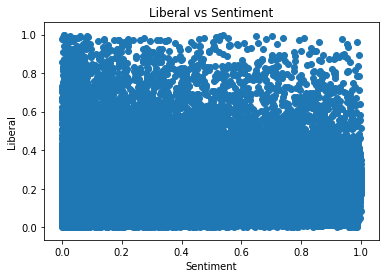

In [155]:
plt.scatter(sentiment, liberal)
plt.title('Liberal vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberal')
plt.show()




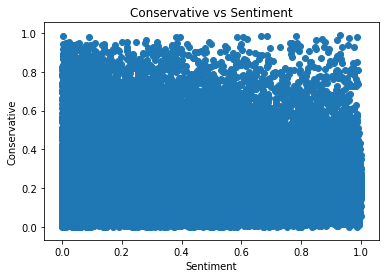

In [156]:
plt.scatter(sentiment, conservative)
plt.title('Conservative vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conservative')
plt.show()


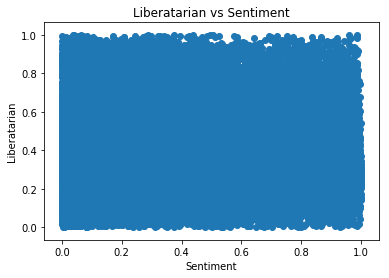

In [157]:
plt.scatter(sentiment, libertarian)
plt.title('Liberatarian vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberatarian')
plt.show()


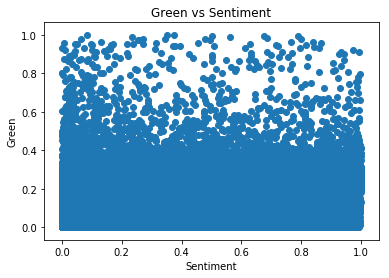

In [158]:
plt.scatter(sentiment, green)
plt.title('Green vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Green')
plt.show()


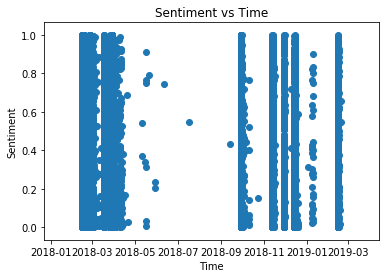

In [159]:
plt.scatter(time, sentiment)
plt.title('Sentiment vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

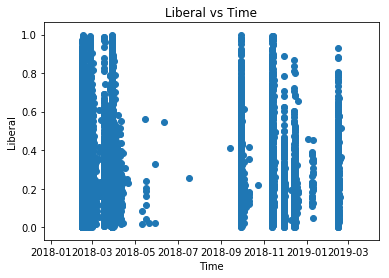

In [142]:
plt.scatter(time, liberal)
plt.title('Liberal vs Time')
plt.xlabel('Time')
plt.ylabel('Liberal')
plt.show()

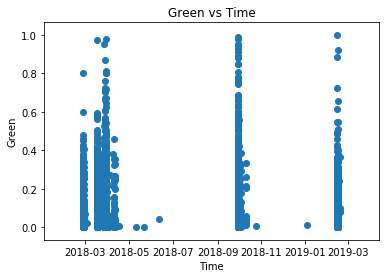

In [104]:
plt.scatter(time, green)
plt.title('Green vs Time')
plt.xlabel('Time')
plt.ylabel('Green')
plt.show()

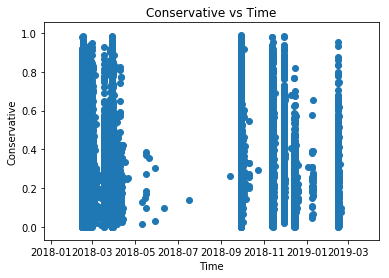

In [141]:
plt.scatter(time, conservative)
plt.title('Conservative vs Time')
plt.xlabel('Time')
plt.ylabel('Conservative')
plt.show()

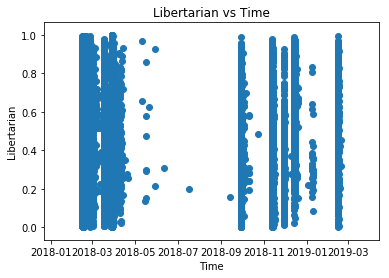

In [140]:
plt.scatter(time, libertarian)
plt.title('Libertarian vs Time')
plt.xlabel('Time')
plt.ylabel('Libertarian')

plt.show()